In [1]:
import requests # Download stuff over the web
import pandas as pd # Makes some nice tables
import nltk # Clean up words, word counts
nltk.download('stopwords') # Make sure stopwords downloaded
from nltk.corpus import stopwords # Make stopwords available
from wordcloud import WordCloud # Make word cloud images
from matplotlib import pyplot as plt # Make figures
# This command display figures inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     grossberg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#treasure island, jekyll and hyde, moby dick
ti_url = 'https://www.gutenberg.org/files/120/120-0.txt'
jh_url = 'https://www.gutenberg.org/files/43/43-0.txt'
md_url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
req = requests.get(ti_url)
print(req.text[:250])

﻿The Project Gutenberg EBook of Treasure Island, by Robert Louis Stevenson

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Pro


In [3]:
ti_text = (req.text.split('START OF THIS PROJECT GUTENBERG EBOOK'))[-1]
ti_text = ti_text.strip()
ti_text[:250]

'TREASURE ISLAND ***\r\n\r\n\r\n\r\n\r\nProduced by Judy Boss, John Hamm and David Widger\r\n\r\n\r\n\r\n\r\n\r\nTREASURE ISLAND\r\n\r\nby Robert Louis Stevenson\r\n\r\n\r\n\r\n\r\nTREASURE ISLAND\r\n\r\nTo S.L.O., an American gentleman in accordance with whose classic taste\r\nthe following '

In [4]:
# Remove Project Gutenberg Header
ti_text = (req.text.split('START OF THIS PROJECT GUTENBERG EBOOK'))[-1]
ti_text = ti_text.strip()
ti_text = '\n'.join(ti_text.split('\r\n')[6:])
ti_text = ti_text.strip()
print(ti_text[:250])

TREASURE ISLAND

by Robert Louis Stevenson




TREASURE ISLAND

To S.L.O., an American gentleman in accordance with whose classic taste
the following narrative has been designed, it is now, in return for
numerous delightful hours, and with the kindes


In [5]:
# Remove Project Gutenberg Header
ti_text = (req.text.split('START OF THIS PROJECT GUTENBERG EBOOK'))[-1]
ti_text = ti_text.strip()
ti_text = '\n'.join(ti_text.split('\r\n')[6:])
ti_text = ti_text.strip()
ti_text[-250:]

'Web site includes information about Project Gutenberg-tm,\nincluding how to make donations to the Project Gutenberg Literary\nArchive Foundation, how to help produce our new eBooks, and how to\nsubscribe to our email newsletter to hear about new eBooks.'

In [6]:
# Remove Project Gutenberg Header
ti_text = (req.text.split('START OF THIS PROJECT GUTENBERG EBOOK'))[-1]
ti_text = ti_text.strip()
ti_text = '\n'.join(ti_text.split('\r\n')[6:])
ti_text = ti_text.strip()
# Remove Footer
ti_text = ti_text.split('*** END OF THIS PROJECT GUTENBERG')[0]
ti_text[-250:]

"are when I hear the surf booming about\nits coasts or start upright in bed with the sharp voice of Captain Flint\nstill ringing in my ears: “Pieces of eight! Pieces of eight!”\n\n\n\n\n\nEnd of Project Gutenberg's Treasure Island, by Robert Louis Stevenson\n\n"

In [7]:
# Remove Project Gutenberg Header
ti_text = (req.text.split('START OF THIS PROJECT GUTENBERG EBOOK'))[-1]
ti_text = ti_text.strip()
ti_text = '\n'.join(ti_text.split('\r\n')[6:])
ti_text = ti_text.strip()
# Remove Footer
ti_text = ti_text.split('*** END OF THIS PROJECT GUTENBERG')[0]
ti_text = '\n'.join(ti_text.split('\n')[:-3])
ti_text[-250:]

'ck again to that accursed island; and\nthe worst dreams that ever I have are when I hear the surf booming about\nits coasts or start upright in bed with the sharp voice of Captain Flint\nstill ringing in my ears: “Pieces of eight! Pieces of eight!”\n\n\n\n\n'

In [8]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
ti_tokens = tokenizer.tokenize(ti_text)

In [9]:
# A new list to hold the lowercased words
ti_words = [word.lower() for word in ti_tokens]

# Printing out the first 8 words / tokens 
# ... YOUR CODE FOR TASK 5 ...
ti_words[:8]

['treasure',
 'island',
 'by',
 'robert',
 'louis',
 'stevenson',
 'treasure',
 'island']

In [10]:
# Getting the English stop words from nltk
sw = stopwords.words('english')

# Printing out the first eight stop words
# ... YOUR CODE FOR TASK 6 ...
sw[:8]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

In [11]:
# A new list to hold Moby Dick with No Stop words
ti_words_ns = [word for word in ti_words
                  if word not in sw]

# Printing the first 5 words_ns to check that stop words are gone
# ... YOUR CODE FOR TASK 7 ...
ti_words_ns[:5]

['treasure', 'island', 'robert', 'louis', 'stevenson']

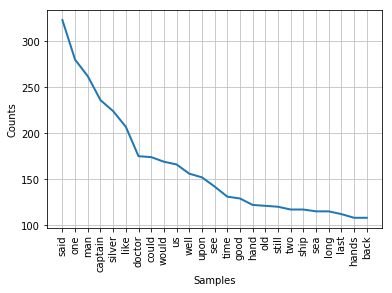

In [12]:
# Creating the word frequency distribution
ti_freqdist = nltk.FreqDist(ti_words_ns)

# Plotting the word frequency distribution
# ... YOUR CODE FOR TASK 8 ...
ti_freqdist.plot(25)

In [13]:
for word, frequency in ti_freqdist.most_common(10):
    print(word, frequency)

said 323
one 280
man 262
captain 236
silver 224
like 207
doctor 175
could 174
would 169
us 166


In [14]:
def text_to_words(url):
    req = requests.get(url)
    # Remove Project Gutenberg Header
    text = (req.text.split('START OF THIS PROJECT GUTENBERG EBOOK'))[-1]
    text = text.strip()
    text = '\n'.join(text.split('\r\n')[6:])
    text = text.strip()
    # Remove Footer
    text = text.split('*** END OF THIS PROJECT GUTENBERG')[0]
    text = '\n'.join(text.split('\n')[:-3])
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    words = [word.lower() for word in tokens]
    words_ns = [word for word in words
                  if word not in sw]
    return text, words, words_ns

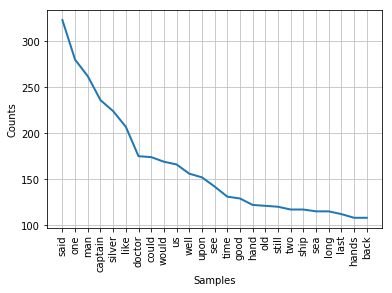

In [15]:
text, words, words_ns = text_to_words(ti_url)
freqdist = nltk.FreqDist(words_ns)
freqdist.plot(25)

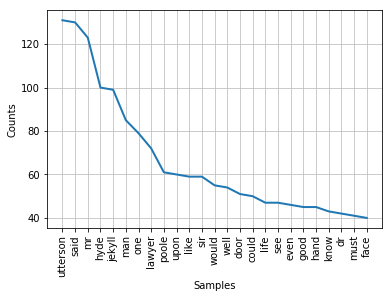

In [16]:
jh_text, jh_words, jh_words_ns = text_to_words(jh_url)
jh_freqdist = nltk.FreqDist(jh_words_ns)
jh_freqdist.plot(25)

In [17]:
for word, frequency in jh_freqdist.most_common(10):
    print(word, frequency)

utterson 131
said 130
mr 123
hyde 100
jekyll 99
man 85
one 79
lawyer 72
poole 61
upon 60


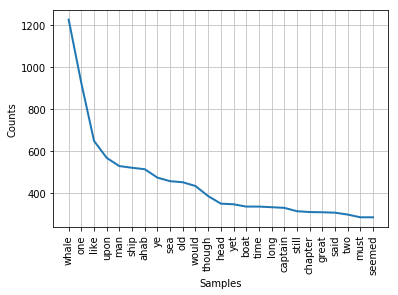

In [18]:
md_text, md_words, md_words_ns = text_to_words(md_url)
md_freqdist = nltk.FreqDist(md_words_ns)
md_freqdist.plot(25)

In [19]:
for word, frequency in md_freqdist.most_common(10):
    print(word, frequency)

whale 1225
one 922
like 647
upon 566
man 527
ship 519
ahab 512
ye 472
sea 455
old 450


In [20]:
word_df = pd.DataFrame({'md_words': [ item[0] for item in  md_freqdist.most_common(150)],
                        'md_freqs':[ item[1] for item in  md_freqdist.most_common(150)],
                        'ti_words': [ item[0] for item in  ti_freqdist.most_common(150)],
                        'ti_freqs':[ item[1] for item in  ti_freqdist.most_common(150)],
                        'jh_words': [ item[0] for item in  jh_freqdist.most_common(150)],
                        'jh_freqs':[ item[1] for item in  jh_freqdist.most_common(150)]})

In [21]:
word_df.head(10)

,md_words,md_freqs,ti_words,ti_freqs,jh_words,jh_freqs
0,whale,1225,said,323,utterson,131
1,one,922,one,280,said,130
2,like,647,man,262,mr,123
3,upon,566,captain,236,hyde,100
4,man,527,silver,224,jekyll,99
5,ship,519,like,207,man,85
6,ahab,512,doctor,175,one,79
7,ye,472,could,174,lawyer,72
8,sea,455,would,169,poole,61
9,old,450,us,166,upon,60


In [26]:
mobyDict = dict(zip(word_df['md_words'],
                    word_df['md_freqs']))

wc = WordCloud(background_color="black",width=400,height=800, max_words=150)
wc.generate_from_frequencies(mobyDict)

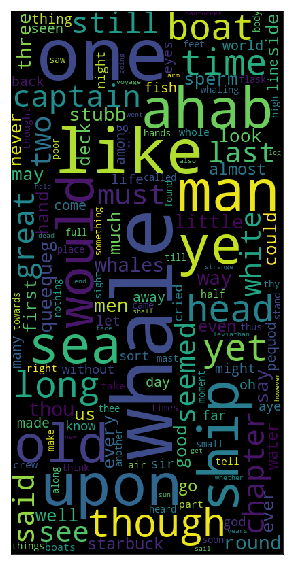

In [27]:
fig, ax = plt.subplots(1,figsize=(6,10))
ax.imshow(wc)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [24]:
word_clouds_dicts =[mobyDict]
word_clouds_dicts.append(dict(zip(word_df['ti_words'],
                                  word_df['ti_freqs'])))
word_clouds_dicts.append(dict(zip(word_df['jh_words'],
                                  word_df['jh_freqs'])))

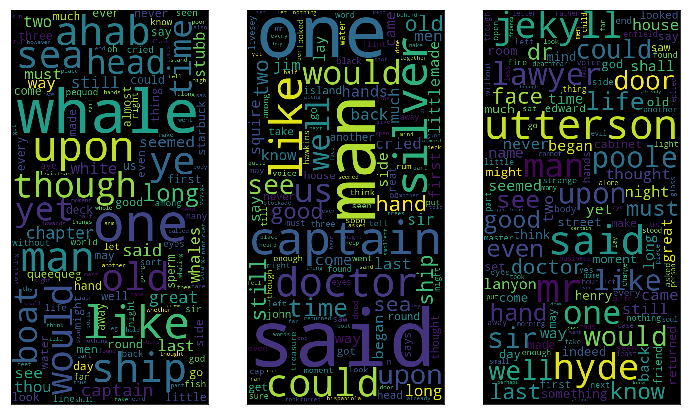

In [25]:
fig, axs = plt.subplots(1,3,figsize=(12,20))
for cloud_dict, ax in zip(word_clouds_dicts,axs):
    wc = WordCloud(background_color="black",width=400,height=800, max_words=150)
    wc.generate_from_frequencies(cloud_dict)
    ax.imshow(wc)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)